### Imports

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [4]:
path = "/Users/ecem/Desktop/phonocardiogram/data/AV/absent"
waves = np.load(path + "/absent_AV_waves_10sec.npy", allow_pickle= True)

In [5]:
waves.shape

(6980, 40000)

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

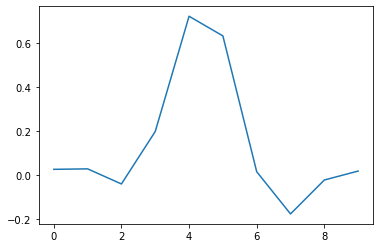

In [6]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(waves[0], w, level=6)

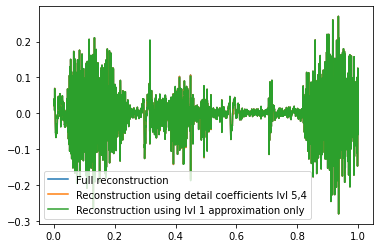

In [7]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

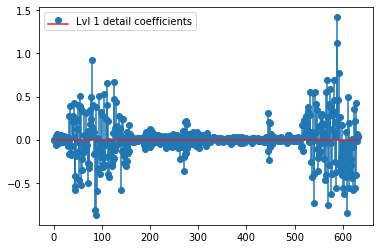

In [8]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

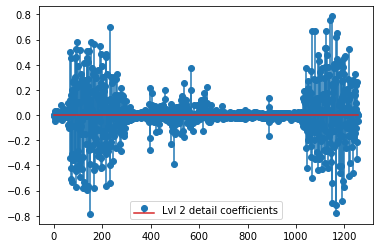

In [9]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


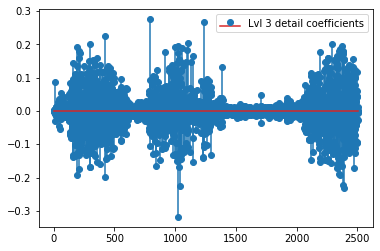

In [10]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


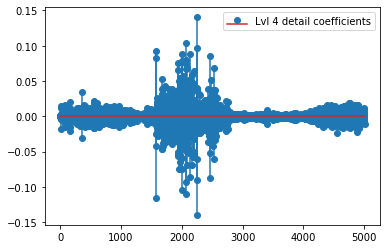

In [11]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


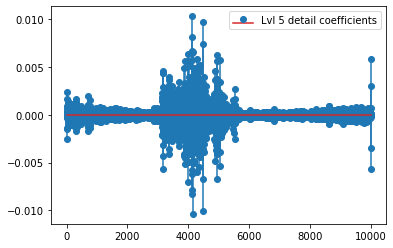

In [12]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


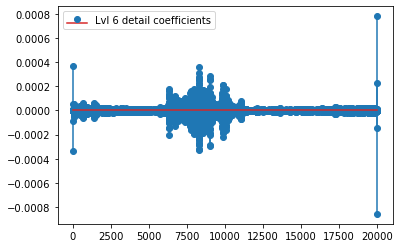

In [13]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [14]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(waves[0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = waves[0] - approx_lvl1_interp

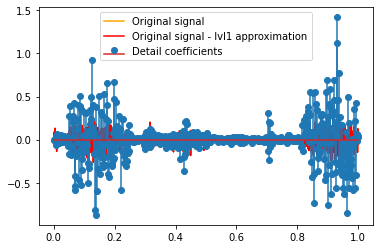

In [15]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(waves[0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

In [16]:
import pandas as pd

In [17]:
type(pywt.wavedec(waves[0], w, level=6))

list

In [18]:
coef = []
for i in range(len(waves)):
    coef.append(pywt.wavedec(waves[i], w, level=6))

In [19]:
for i in range(7):
    print(coef[0][i].shape)

(633,)
(633,)
(1258,)
(2508,)
(5007,)
(10006,)
(20004,)


In [20]:
coef[0]

[array([ 1.90281466e-01,  1.77397683e-01,  1.83583617e-01,  2.12743714e-01,
         2.50963926e-01,  2.58863121e-01, -4.09842320e-02, -5.16937792e-01,
        -3.98834556e-01, -3.76748145e-01, -2.46020034e-01, -3.53125902e-03,
         1.71576336e-01,  2.82196224e-01,  1.51838124e-01,  2.39550814e-01,
         1.48012817e-01, -6.48081899e-02, -1.24099188e-01, -8.03540647e-02,
         1.90358683e-01,  2.89559841e-01,  3.79286110e-02,  4.08401415e-02,
         1.43987909e-01, -2.12505221e-01, -2.68863678e-01, -2.03686520e-01,
        -8.42048749e-02,  3.75401117e-02,  1.06243797e-01,  5.38880154e-02,
        -2.20419038e-02, -1.13370538e-01, -2.02672370e-02, -1.47518635e-01,
         1.08195141e-01,  7.14669749e-02,  2.07248807e-01, -7.55800754e-02,
         1.31041259e-01, -1.01774774e-01,  5.84819987e-02, -8.36677775e-02,
         1.43273801e-01, -2.60057896e-01, -1.17572494e-01,  3.63907553e-02,
        -2.66899675e-01,  1.79770529e-01, -1.13922700e-01,  2.49069706e-01,
         8.0

In [21]:
coef[1]

[array([-1.37596250e-01, -1.43247563e-02, -2.52310541e-02, -1.27460107e-01,
         1.03366174e-01, -1.28950030e-01, -5.26718080e-01,  2.64244944e-01,
         4.16920900e-01, -1.29386425e-01,  8.28701854e-02, -9.82195586e-02,
         2.46352747e-01, -8.53246823e-02,  2.54842155e-02,  1.83517322e-01,
        -4.98992428e-02, -1.11925647e-01, -9.96903516e-04, -6.73524961e-02,
        -2.49902476e-02, -3.99690829e-02,  5.78929037e-02,  1.74224265e-02,
        -9.65970382e-03, -4.72524017e-02, -1.42913116e-02,  5.21185547e-02,
        -3.48912440e-02, -4.90820035e-03, -4.15403508e-02, -2.62787491e-02,
        -2.60816086e-02, -2.23562345e-02, -1.09200858e-01, -5.96421733e-02,
         3.59741487e-02,  3.53299081e-02,  4.01454680e-02,  3.68558243e-02,
        -1.06469961e-02, -4.18283790e-02,  7.76685178e-02,  7.89141655e-02,
         5.97458854e-02,  5.46897091e-02, -3.66442464e-02, -3.75578888e-02,
        -3.21062803e-02, -3.35745141e-02, -6.00330997e-03,  2.73346547e-02,
         2.5

### Level by level

In [22]:
def level_coef_extractor_3d(array, lvl = 0):
    array =np.array(array)
    
    lenn = array[0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0],lenn)) #2392,48
    
    for i in range(array.shape[0]):
        coef[i,:] = array[i][lvl]
        
    return coef

In [23]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [24]:
for i in range(7):
    saver(coef, i, path, 'absent_AV_wavelet_coef')


In [26]:
waves_ = np.load(path+ "/absent_AV_wavelet_coef_lvl_0.npy",  allow_pickle = True)

In [27]:
waves.shape

(6980, 40000)

In [28]:
waves[0]

array([ 0.02140091,  0.02267499,  0.02397811, ..., -0.01884388,
       -0.01579442, -0.01284505], dtype=float32)

In [29]:
waves[10]

array([ 1.1715358e-02,  8.5145272e-03,  7.7912873e-03, ...,
        7.8343379e-05, -9.4659757e-05,  0.0000000e+00], dtype=float32)

### Check whether each data saved correctly

In [30]:
def column_namer(level = 0, lenght = 48):
    x = []
    for i in range(lenght):
        x.append("lvl{0}_x{1}".format(level, i))
    
    return x 

In [31]:
import pandas as pd

In [32]:
def dataframe_checker(path, name = "wavelet", df = pd.DataFrame(), level = 0):

    values  = []

    array = np.load(path + "/" + name + "_lvl_{}.npy".format(level), allow_pickle = True)
    columns = column_namer(level = level, lenght = array.shape[1])
    
    for i in range(array.shape[0]):
        values.append(array[i].tolist()) 

        medium = pd.DataFrame([values[i]], columns = columns)
        
        df = pd.concat([df, medium], axis = 0)
        
    
    return df

In [33]:
df = dataframe_checker(path,  "absent_AV_wavelet_coef", level = 0 )
df

KeyboardInterrupt: 